# Guided Project: Investigating Fandango Movie Ratings

## Is Fandango Still Inflating Ratings? 

For this particular project, the objective was to analyze more recent movie ratings from Fandango to determine whether there has been any change in their rating system after Hickey's discovery. Hickey, a data journalist, had evidence that suggested Fandango's rating system was biased and not completely a good indicator for movie ratings. He found that the ratings were almost always rounded up to the nearest half-star which suggested strong biased. Also, he created a graph that shows that the data is mostly left-skewed, showing that there are more higher ratings than lower ratings. Therefore, I wanted to gain deeper insight into what was going on by doing this project. 

## Understanding the Data 

In order to gain information on whether there has been change in the rating system, I decided to compare the system both pre and post analysis. Therefore, I will analyze the data Hickey made public on GitHub and the data one of the Dataquest's team members collected. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

fandango_before = pd.read_csv('fandango_score_comparison.csv', parse_dates = True)
fandango_after = pd.read_csv('movie_ratings_16_17.csv', parse_dates = True)
fandango_hickey = fandango_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_dataquest = fandango_after[['movie', 'year', 'fandango']].copy()
fandango_hickey.head()
fandango_dataquest.head()


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


## Changing the Goal of our Analysis

From analyzing both READ.md files in the respective repositories, it can be seen that the sampling processes were not random and the samples are not representative in what our task is at hand. In order to achieve the task at hand, I will slightly change the goal of the analysis instead of collecting new data which is very time consuming. The change that I will implement will be changing the population of interest and accepting the fact that the samples do in fact represent the population well. This is overall a good proxy for the original goal and will answer the questions we wish to answer. Therefore, the new goal is to find out whether there's any differences between the Fandango's ratings in 2015 and in 2016. This then allows us to have two populations at hand, Fandango ratings for movies in 2015 and Fandango ratings for movies in 2016. Also, we will say 30 fan ratings or more on Fandango is considered "popular".

## Isolating the Samples We Need

After looking at the data, I noticed that there are some mmovies that were not released in 2015 and 2016. Therefore, I will separate the data into two data sets: 

1) Movies released in 2015 

2) Movies released in 2016

In [2]:
fandango_hickey.sample(10, random_state = 1)
fandango_dataquest.sample(10, random_state = 1)
sum(fandango_hickey['Fandango_votes'] < 30) 
fandango_hickey.head(2)
fandango_hickey['Year'] = fandango_hickey['FILM'].str[-5:-1]
fandango_hickey['Year'].head()
fandango_hickey['Year'].value_counts()
fandango_2015 = fandango_hickey[fandango_hickey['Year'] == '2015'].copy()
fandango_2015['Year'].value_counts()


2015    129
Name: Year, dtype: int64

In [5]:
fandango_2016 = fandango_dataquest.copy()
fandango_2016['year'].value_counts()
fandango_2016 = fandango_2016[fandango_2016['year'] == 2016]
fandango_2016['year'].value_counts()


2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

After cleaning the data, I now want to start analyzing the two samples that I obtained from the previous step when I isolated the data. 

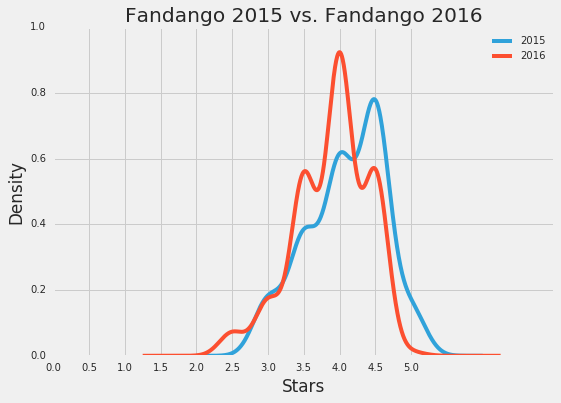

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize=(8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True, figsize=(8,5.5))
plt.title('Fandango 2015 vs. Fandango 2016')
plt.xticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.xlabel('Stars')
plt.show()


The shape of each distribution for 2015 and 2016 is approximately normal. There is an indication that there was an increase in the apex of 2016 for the stars compared to that of 2015. However, ovreall, the movies in 2016 were rated slightly loewr than in 2015. 

## Comparing Relative Frequencies 

In [17]:
print('2015' + '\n' + '-' * 16)
fandango_2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100


2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [18]:
print('2016' + '\n' + '-' * 16)
fandango_2016['fandango'].value_counts(normalize = True).sort_index() * 100

2016
----------------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The samples have different number of movies, and therefore, it does not make sense to compare absolute frequencies. Therefore, we will normalize the counts in order to avoid this and we would be using relative frequencies. The relative frequencies will be represented by percentages instead of proportions. 

## Determining the Direction of the Change

From the two tables, it is clear that there is a difference between the two distributions. However, the direction in which it moves towards to is not as clear compared to that of the kernel density plot plotted earlier. I will conduct a few summary statistics to get a bigger picture of the direction. I will take the mean, median, and mode and compare to that the direction of the difference. 

In [21]:
print(fandango_2015['Fandango_Stars'].mean())
print(fandango_2015['Fandango_Stars'].median())
print(fandango_2015['Fandango_Stars'].mode()[0])

4.0852713178294575
4.0
4.5


In [22]:
print(fandango_2016['fandango'].mean())
print(fandango_2016['fandango'].median())
print(fandango_2016['fandango'].mode()[0])

3.887434554973822
4.0
4.0


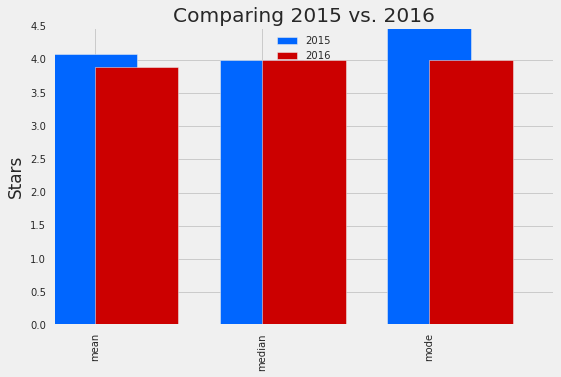

In [38]:
summary = pd.DataFrame()
summary['2015'] = [fandango_2015['Fandango_Stars'].mean(), fandango_2015['Fandango_Stars'].median(), fandango_2015['Fandango_Stars'].mode()[0]]
summary['2016'] = [fandango_2016['fandango'].mean(), fandango_2016['fandango'].median(), fandango_2016['fandango'].mode()[0]]
summary.index = ['mean', 'median', 'mode']
summary

summary['2015'].plot.bar(color = '#0066FF', label = '2015', align = 'center', figsize=(8,5))
summary['2016'].plot.bar(color = '#CC0000', label = '2016', align = 'edge', figsize=(8,5))
plt.style.use('fivethirtyeight')
plt.title('Comparing 2015 vs. 2016')
plt.ylabel('Stars')
plt.legend(loc = 'upper center')
plt.show()

In [35]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

## Conclusion

Overall, there is a slight difference in the Fandango movie ratings in 2015 and 2016. Also, in 2016, movies were rated lower compared to that of 2015. 